# Generating a Gene Expression Signature from scRNAseq: GSE144735

We collected scRNAseq from the following publication to create a gene-expression signature to further use in the deconvolution process: 

https://www.nature.com/articles/s41588-020-0636-z

In [33]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os

data_type = 'float32'

import cell2location

import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
os.listdir()

['11_10_Clustering_BayesSpace_SampleA938797_Rep1.html',
 '09_TF_CellAbundanceCMS_Correlation_02_OnlyCMS2.html',
 '16_08_LigReceptor_Interactions_SampleA120838_Rep2.Rmd',
 '08_Pathway_CellAbundanceCMS_Correlation.Rmd',
 '14_InterPatient_Hetereogeneity_Harmony.Rmd',
 '03_GeneExpressionExploration.Rmd',
 '15_IntegratedBayesSpace_PatientA595688_PathwayActivity.Rmd',
 '15_06_IntraPatientHetereogeneity_SampleA938797_Rep2.html',
 'Pub_XX_ArrangeCell2LocPlots.html',
 '15_03_IntraPatientHetereogeneity_SampleA595688_Rep1.Rmd',
 '19_03_Misty_LigandsTFs_SampleA120838_Rep1_Juxta2.Rmd',
 'SPOTlight_VIsualization.R',
 '17_08_Misty_LigandsTFs_SampleA120838_Rep2.Rmd',
 '21_graphGeneration_SP3_CEBPD_A120838.html',
 '15_IntegratedBayesSpace_PatientA938797_ColonSetsScore.Rmd',
 'Pub_XX_Progeny.html',
 '15_04_02_IntraPatientHetereogeneity_SampleA595688_Rep2.html',
 '10_GeneExpression_CellAbundance_Correlation.Rmd',
 '14_InterPatient_Hetereogeneity_PseudoBulk.Rmd',
 '19_03_Misty_LigandsTFs_SampleA595688_Rep

In [35]:
matrix_path ='Cell2Location/inputs/scRNAseq-ref/KUL3_cohort/GSE144735_processed_KUL3_CRC_10X_raw_UMI_count_matrix.txt'

matrix = pd.read_csv(matrix_path, sep="\t", index_col = "Index").transpose()

# adata = sc.read_text(
#    matrix_txt)      

In [36]:
adata = anndata.AnnData(sparse.csr_matrix(matrix.values),
                        obs=pd.DataFrame(matrix.index),
                        var=pd.DataFrame(matrix.columns))
adata.obs = adata.obs.rename(columns={0: "Spot_ID"}).set_index("Spot_ID")
adata.var = adata.var.rename(columns={"Index": "SYMBOL"}).set_index('SYMBOL')

In [37]:
adata.var_names_make_unique() 
adata.var['SYMBOL'] = adata.var_names
adata.var.index = adata.var.index.rename('ENSEMBL')

In [38]:
adata.var

,SYMBOL
ENSEMBL,
RP11-34P13.3,RP11-34P13.3
FAM138A,FAM138A
OR4F5,OR4F5
RP11-34P13.7,RP11-34P13.7
RP11-34P13.8,RP11-34P13.8
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1


In [39]:
adata.obs

""
Spot_ID
KUL01-T_AAACCTGGTCTTTCAT
KUL01-T_AAACGGGTCGGTTAAC
KUL01-T_AAAGATGGTATAGGGC
KUL01-T_AAAGATGGTGGCCCTA
KUL01-T_AAAGCAAGTAAACACA
...
KUL31-N_CGCTTCAGTGGTCCGT
KUL31-N_CTGTTTAAGGGTTCCC
KUL31-N_GCCTCTATCGCGGATC


In [40]:
metadata=pd.read_csv('Cell2Location/inputs/scRNAseq-ref/KUL3_cohort/GSE144735_processed_KUL3_CRC_10X_annotation.txt', sep='\t', index_col = "Index")

In [41]:
metadata

,Patient,Class,Sample,Cell_type,Cell_subtype
Index,,,,,
KUL01-T_AAACCTGGTCTTTCAT,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAACGGGTCGGTTAAC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTATAGGGC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTGGCCCTA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAAGCAAGTAAACACA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
...,...,...,...,...,...
KUL31-N_CGCTTCAGTGGTCCGT,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_CTGTTTAAGGGTTCCC,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_GCCTCTATCGCGGATC,KUL31,Normal,KUL31-N,Mast cells,Mast cells


In [42]:
adata.obs = adata.obs.join(metadata, how='inner', lsuffix='', rsuffix='')
adata = adata[~adata.obs['Cell_type'].isna(), :]

In [43]:
adata.obs

,Patient,Class,Sample,Cell_type,Cell_subtype
KUL01-T_AAACCTGGTCTTTCAT,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAACGGGTCGGTTAAC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTATAGGGC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTGGCCCTA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAAGCAAGTAAACACA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
...,...,...,...,...,...
KUL31-N_CGCTTCAGTGGTCCGT,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_CTGTTTAAGGGTTCCC,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_GCCTCTATCGCGGATC,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_GGGATGATCACCTCGT,KUL31,Normal,KUL31-N,Mast cells,Mast cells


## Reduce the number of genes by discarding lowly expressed genes


Trying to set attribute `.obs` of view, copying.


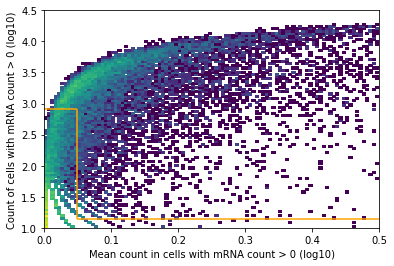

In [44]:
# remove cells and genes with 0 counts everywhere
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)

# calculate the mean of each gene across non-zero cells
adata.var['n_cells'] = (adata.X.toarray() > 0).sum(0)
adata.var['nonz_mean'] = adata.X.toarray().sum(0) / adata.var['n_cells']

plt.hist2d(np.log10(adata.var['nonz_mean']),
           np.log10(adata.var['n_cells']), bins=100,
           norm=mpl.colors.LogNorm(),
           range=[[0,0.5], [1,4.5]]);

nonz_mean_cutoff = np.log10(1.12) # cut off for expression in non-zero cells
cell_count_cutoff = np.log10(adata.shape[0] * 0.0005) # cut off percentage for cells with higher expression
cell_count_cutoff2 = np.log10(adata.shape[0] * 0.03)# cut off percentage for cells with small expression

plt.vlines(nonz_mean_cutoff, cell_count_cutoff, cell_count_cutoff2, color = 'orange');
plt.hlines(cell_count_cutoff, nonz_mean_cutoff, 1, color = 'orange');
plt.hlines(cell_count_cutoff2, 0, nonz_mean_cutoff, color = 'orange');
plt.xlabel('Mean count in cells with mRNA count > 0 (log10)');
plt.ylabel('Count of cells with mRNA count > 0 (log10)');

In [45]:
adata[:,(np.array(np.log10(adata.var['nonz_mean']) > nonz_mean_cutoff)
         | np.array(np.log10(adata.var['n_cells']) > cell_count_cutoff2))
      & np.array(np.log10(adata.var['n_cells']) > cell_count_cutoff)].shape

(27414, 13445)

In [46]:
# select genes based on mean expression in non-zero cells
adata = adata[:,(np.array(np.log10(adata.var['nonz_mean']) > nonz_mean_cutoff)
         | np.array(np.log10(adata.var['n_cells']) > cell_count_cutoff2))
      & np.array(np.log10(adata.var['n_cells']) > cell_count_cutoff)
              & np.array(~adata.var['SYMBOL'].isna())]

In [47]:
# Add counts matrix as adata.raw
adata.raw = adata

## Cell Annotations

In [48]:
adata.X = adata.raw.X.copy()


In [49]:
sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', n_comps=80, use_highly_variable=False)

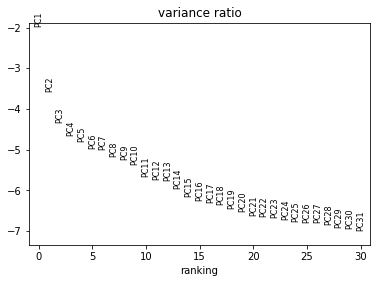

In [50]:
sc.pl.pca_variance_ratio(adata, log=True)

In [51]:
# remove the first PC which explains large amount of variance in total UMI count (likely technical variation)
adata.obsm['X_pca'] = adata.obsm['X_pca'][:, 1:]
adata.varm['PCs'] = adata.varm['PCs'][:, 1:]
#########################

# Here BBKNN (https://github.com/Teichlab/bbknn) is used to align batches (10X experiments)
import bbknn
bbknn.bbknn(adata, neighbors_within_batch = 3, batch_key = 'Sample', n_pcs = 79)
sc.tl.umap(adata, min_dist = 0.8, spread = 1.5)

#########################

adata = adata[adata.obs['Cell_subtype'].argsort(),:]

Trying to set attribute `.obs` of view, copying.
... storing 'Patient' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Class' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Cell_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Cell_subtype' as categorical


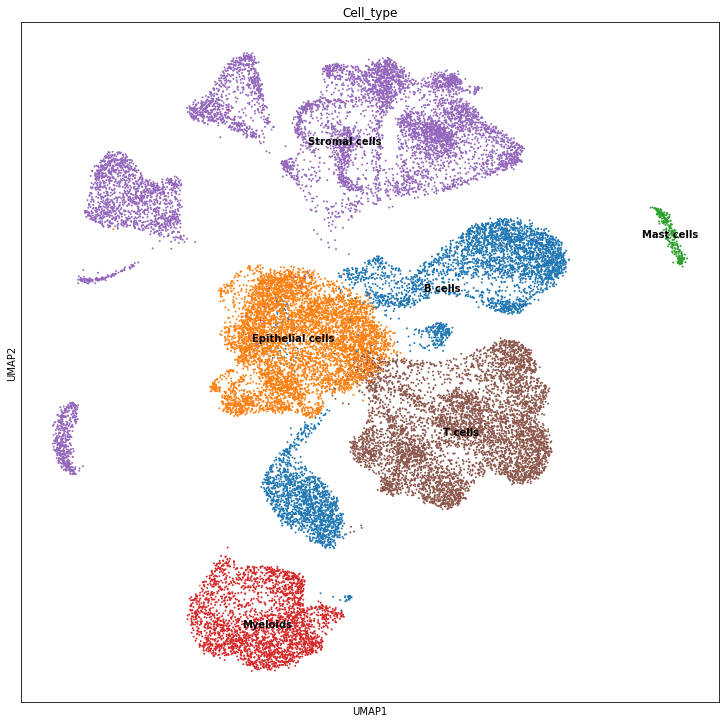

In [52]:
with mpl.rc_context({'figure.figsize': [12.5, 12.5],
                     'axes.facecolor': 'white'}):
    sc.pl.umap(adata, color=['Cell_type'], size=15,
               color_map = 'RdPu', ncols = 1, legend_loc='on data',
               legend_fontsize=10)

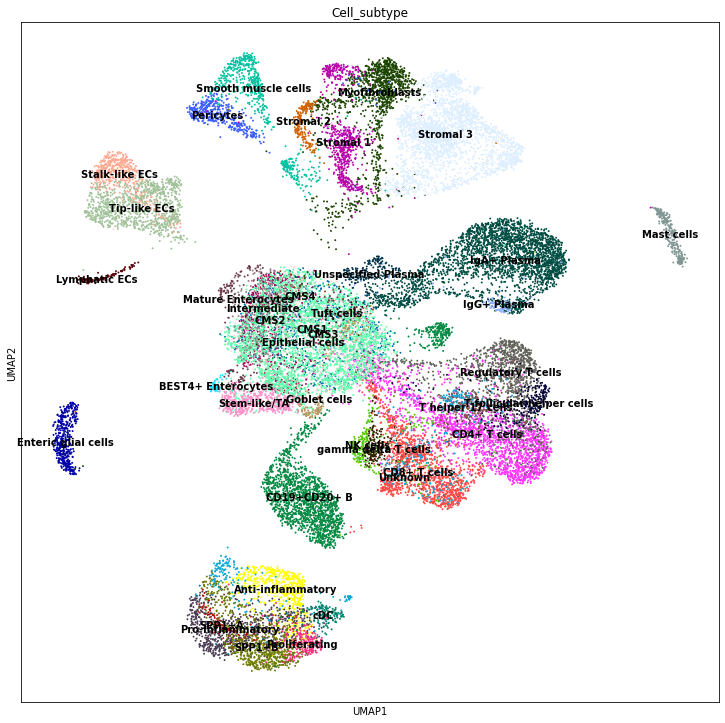

In [53]:
with mpl.rc_context({'figure.figsize': [12.5, 12.5],
                     'axes.facecolor': 'white'}):
    sc.pl.umap(adata, color=['Cell_subtype'], size=15,
               color_map = 'RdPu', ncols = 1, legend_loc='on data',
               legend_fontsize=10)

## Estimating expression signatures

### Creating model ### - time 0.01 min
### Analysis name: RegressionGeneBackgroundCoverageTorch_58covariates_27414cells_13445genes
### Training model to determine n_epochs with CV ###


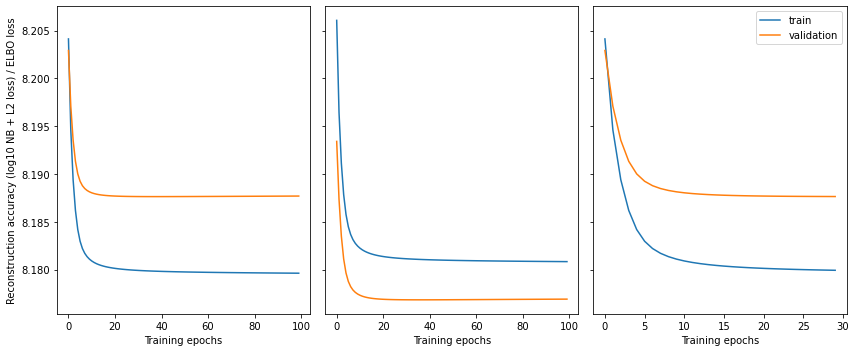

### Re-training model to stop before overfitting ###


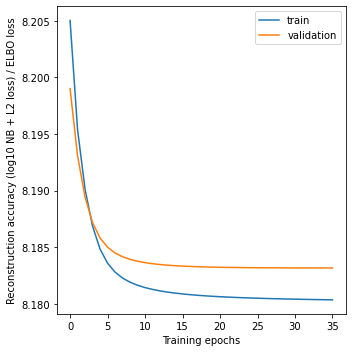

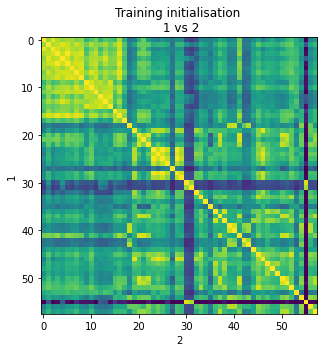

### Evaluating parameters / sampling posterior ### - time 19.78 min


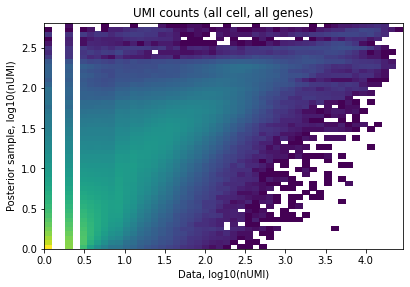

### Saving results ###
### Plotting results ###


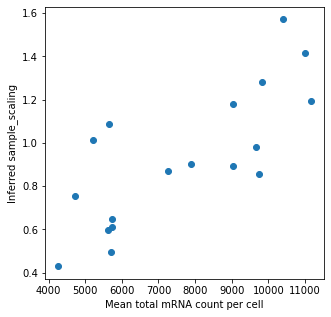

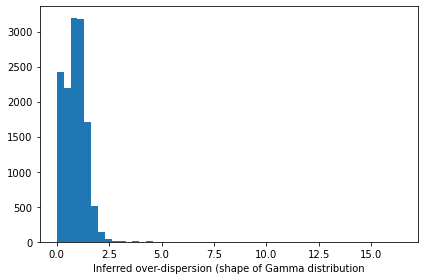

### Done ### - time 20.62 min


In [54]:
# Run the pipeline:
results_folder = 'Cell2Location/results/'
from cell2location import run_regression
r, adata = run_regression(adata, # input data object]

                   verbose=True, return_all=True,

                   train_args={
                    'covariate_col_names': ['Cell_subtype'], # column listing cell type annotation
                    'sample_name_col': 'Sample', # column listing sample ID for each cell

                    # column listing technology, e.g. 3' vs 5',
                    # when integrating multiple single cell technologies corresponding
                    # model is automatically selected
                    'tech_name_col': None,

                    'stratify_cv': 'Cell_subtype', # stratify cross-validation by cell type annotation

                    'n_epochs': 100, 'minibatch_size': 1024, 'learning_rate': 0.01,

                    'use_cuda': True, # use GPU?

                    'train_proportion': 0.9, # proportion of cells in the training set (for cross-validation)
                    'l2_weight': True,  # uses defaults for the model

                    'readable_var_name_col': 'SYMBOL', 'use_raw': True},

                   model_kwargs={}, # keep defaults
                   posterior_args={}, # keep defaults

                   export_args={'path': results_folder + 'regression_model/', # where to save results
                                'save_model': True, # save pytorch model?
                                'run_name_suffix': ''})

reg_mod = r['mod']